Here I will check the jfs theory against simulations run using Ali's truncated coalescent simulator (not a Moran simulator) 

In [1]:
import pandas as pd
import numpy as np
import pickle
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

In [2]:
#The simulated jfs distribution was calculated in a seperate Python script
with open("/home/farid/Documents/NonGitCode/JFSDist5E4", "rb") as file: 
    jfsDist = pickle.load(file)

In [3]:
jfsDist = 1/2 * (jfsDist + np.transpose(jfsDist))
jfsDist /= np.sum(jfsDist)

In [5]:
#importing theoretical calculations which were done in Mathematica
from functools import reduce
with open('/home/farid/Documents/git/jfsNumerics/Mathematica/JointFreqSpectrum10_Revised'
          ,'rb') as f:
    depth=np.fromfile(f,dtype=np.dtype('int32'),count=1)
    dims =np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs10_theory_rev =np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
         count=reduce(lambda x,y:x*y,dims)),dims)


In [8]:
with open('/home/farid/Documents/git/jfsNumerics/Mathematica/JointFreqSpectrum10_StepChangeTau25c2',
          'rb') as f: 
    depth=np.fromfile(f, dtype=np.dtype('int32'), count=1)
    dims = np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs_stepChange_25_2_theory=np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
                                                count=reduce(lambda x,y:x*y,dims)), dims)

In [15]:
relative_diff = (jfs10_theory_rev-jfs_stepChange_25_2_theory)/jfs10_theory_rev

In [7]:
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set()
plt.rcParams["font.family"] = "monospace"

In [9]:
log_sim = np.log(jfsDist)
log_theory = np.log(jfs10_theory_rev)
log_stepChange_25_2_theory = np.log(jfs_stepChange_25_2_theory)

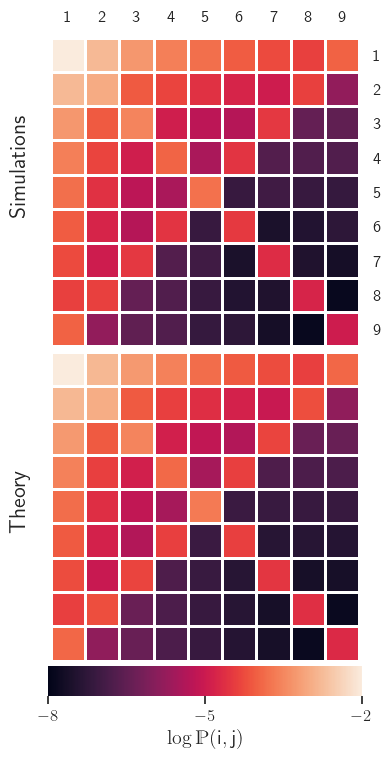

In [10]:
sbn.set(rc={'text.usetex':True, 'font.family':'sans-serif', 'font.sans-serif':'DejaVu Sans'})
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts, dsfont}')
# fig, (ax1, ax2, ax4) = plt.subplots(3,1, 
#                                    sharey=False, 
#                                    sharex=False, 
#                                    figsize=(4.5,9),
#                                    )

fig = plt.figure(figsize=(4.5,9))

num_columns = 20
num_rows = 20

ax1 = plt.subplot2grid((num_rows,num_columns), (0,0), colspan=20, rowspan=9)
ax2 = plt.subplot2grid((num_rows,num_columns), (9,0), colspan=20, rowspan=9)
ax4 = plt.subplot2grid((num_rows,num_columns), (18,1), colspan=18, rowspan=1)

# ax4 = fig.add_axes([36/37, 0.19, 1/37, 0.61])
frequencies = [i for i in range(1,10)]

sbn.heatmap(
    log_sim,
    ax=ax1,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws = {"label":r"\Large$\mathsf{\log \mathds{P}(i,j)}$", 
                "ticks":[-8,-5, -2], 
                "orientation":"horizontal",
                },
    cbar_ax=ax4,
    cmap='rocket')

sbn.heatmap(
    log_theory,
    ax=ax2,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket')

ax1.tick_params(labelright=True, 
                labelleft=False, 
                labeltop=True,
                labelbottom=False,
                labelrotation=0,
                labelsize=12)
ax1.set_title("Simulations", rotation=90, x=-0.1, y=0.4, fontsize=16)

ax2.set_title("Theory", rotation=90, x=-0.1, y=0.4, fontsize=16)
ax4.tick_params(labelsize=12)
plt.show()

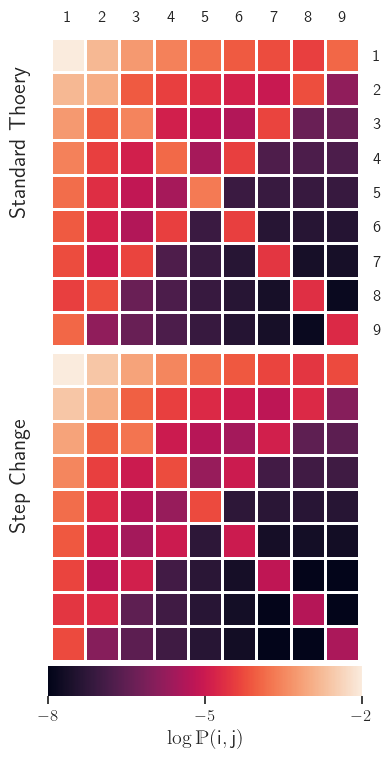

In [11]:
sbn.set(rc={'text.usetex':True, 'font.family':'sans-serif', 'font.sans-serif':'DejaVu Sans'})
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts, dsfont}')
# fig, (ax1, ax2, ax4) = plt.subplots(3,1, 
#                                    sharey=False, 
#                                    sharex=False, 
#                                    figsize=(4.5,9),
#                                    )

fig = plt.figure(figsize=(4.5,9))

num_columns = 20
num_rows = 20

ax1 = plt.subplot2grid((num_rows,num_columns), (0,0), colspan=20, rowspan=9)
ax2 = plt.subplot2grid((num_rows,num_columns), (9,0), colspan=20, rowspan=9)
ax4 = plt.subplot2grid((num_rows,num_columns), (18,1), colspan=18, rowspan=1)

# ax4 = fig.add_axes([36/37, 0.19, 1/37, 0.61])
frequencies = [i for i in range(1,10)]

sbn.heatmap(
    log_theory,
    ax=ax1,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws = {"label":r"\Large$\mathsf{\log \mathds{P}(i,j)}$", 
                "ticks":[-8,-5, -2], 
                "orientation":"horizontal",
                },
    cbar_ax=ax4,
    cmap='rocket')

sbn.heatmap(
    log_stepChange_25_2_theory,
    ax=ax2,
    linewidths=2.0,
    vmin=-8,
    vmax=-2,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket')

ax1.tick_params(labelright=True, 
                labelleft=False, 
                labeltop=True,
                labelbottom=False,
                labelrotation=0,
                labelsize=12)
ax1.set_title("Standard Thoery", rotation=90, x=-0.1, y=0.4, fontsize=16)

ax2.set_title("Step Change", rotation=90, x=-0.1, y=0.4, fontsize=16)
ax4.tick_params(labelsize=12)
plt.show()

In [71]:
logSimsCsv = [np.array([i+1,j+1, log_sim[i,j]]) for i in range(9) for j in range(9)]
logTheoryCsv = [np.array([i+1,j+1, log_theory[i,j]]) for i in range(9) for j in range(9)]

In [72]:
logSimsCsv = np.asarray(logSimsCsv)
logTheoryCsv = np.asarray(logTheoryCsv)

In [73]:
np.savetxt('Logsims.csv', logSimsCsv, delimiter=',', header='', comments='')
np.savetxt('Logtheory.csv', logTheoryCsv, delimiter=',', header='', comments='')

In [74]:
relative_error = (jfs10_theory_rev-jfsDist)/jfsDist

NameError: name 'relative_error' is not defined

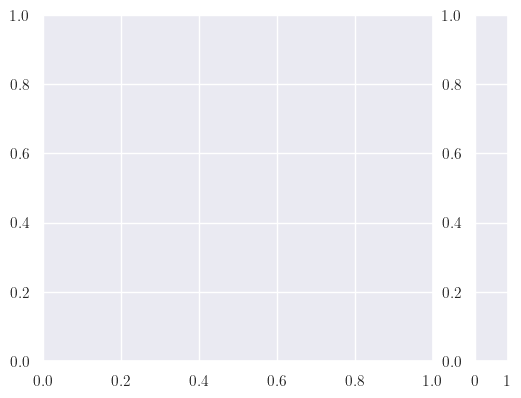

In [17]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 
sbn.heatmap(
    relative_error,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.5,
    vmax=0.5,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("Relative difference of standards vs step change, n = 10")
plt.show()

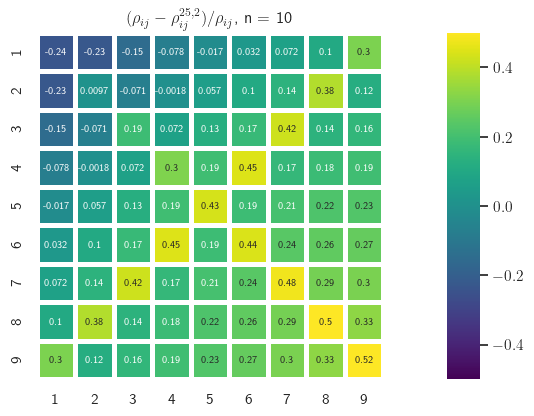

In [18]:
fix, (ax1,ax2) = plt.subplots(1,2, 
                             sharey = False,
                             sharex = False,
                             figsize = (6,4.5),
                             gridspec_kw={'width_ratios':[12,1]}) 
sbn.heatmap(
    relative_diff,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.5,
    vmax=0.5,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={'shrink':0.4},
    cbar_ax=ax2,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title(r"$(\rho_{ij} - \rho_{ij}^{25,2})/\rho_{ij}$, n = 10")
plt.show()

In [76]:
from functools import reduce
with open('/home/farid/Documents/git/jfsNumerics/Mathematica/JointFreqSpectrum6'
          ,'rb') as f:
    depth=np.fromfile(f,dtype=np.dtype('int32'),count=1)
    dims =np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs6_theory =np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
         count=reduce(lambda x,y:x*y,dims)),dims)

In [77]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n6_100000_2", "rb") as file: 
    jfsDist6 = pickle.load(file)

jfsDist6 = 1/2 * (jfsDist6 + np.transpose(jfsDist6))
jfsDist6 /= np.sum(jfsDist6)

In [78]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n6_500000_2", "rb") as file: 
    jfsDist6_ = pickle.load(file)

jfsDist6_ = 1/2 * (jfsDist6_ + np.transpose(jfsDist6_))
jfsDist6_ /= np.sum(jfsDist6_)

In [79]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n6_1000000_2", "rb") as file: 
    jfsDist6_2 = pickle.load(file)

jfsDist6_2 = 1/2 * (jfsDist6_2 + np.transpose(jfsDist6_2))
jfsDist6_2 /= np.sum(jfsDist6_2)

In [80]:
relative_error_n6 = (jfs6_theory-jfsDist6)/jfsDist6
relative_error_n6_ = (jfs6_theory - jfsDist6_)/jfsDist6_
relative_error_n6_2 = (jfs6_theory - jfsDist6_2)/jfsDist6_2

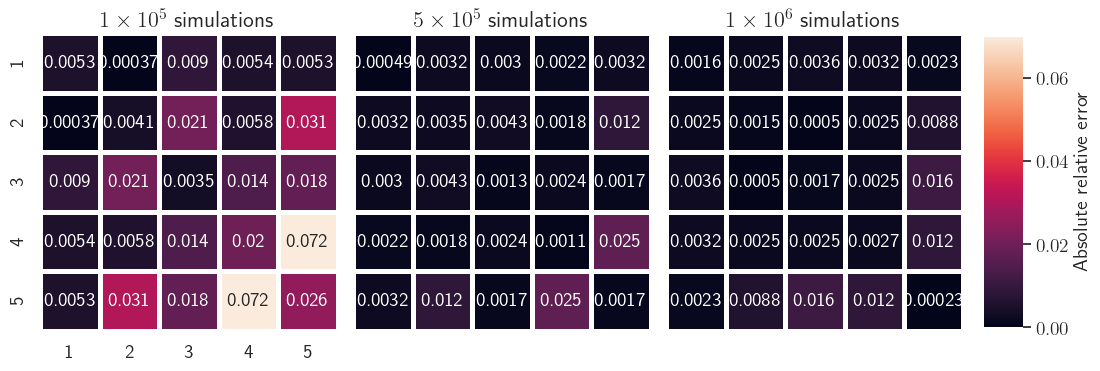

In [81]:
plt.rcParams.update({"text.usetex":True, 
                    "font.family": "sans-serif",
                    "font.sans-serif": "DejaVu Sans",})
# fig, (ax1,ax2, ax3,cbar_ax) = plt.subplots(1,4, 
#                              sharey = False,
#                              sharex = False,
#                              figsize = (13,4.5),
#                              gridspec_kw={}
#                             ) 

fig = plt.figure(figsize=(13,4.5))
# cbar_ax = fig.add_axes([0.915,0.17,0.03,0.65])

numrows = 100
numcolumns = 203

ax1 = plt.subplot2grid((numrows, numcolumns), (0,0), colspan=60, rowspan=100)
ax2 = plt.subplot2grid((numrows, numcolumns), (0,63), rowspan=100, colspan=60)
ax3 = plt.subplot2grid((numrows, numcolumns), (0,126), rowspan=100, colspan=60)
cbar_ax = plt.subplot2grid((numrows, numcolumns), (8,190), rowspan=84, colspan=8)

frequencies = [i for i in range(1,6)]
cbar_kws = dict(label= r"\Large Absolute relative error",
               ticks=[0,0.02,0.04,0.06],
               shrink=0.8)

sbn.heatmap(
    np.abs(relative_error_n6),
    ax=ax1,
    linewidths=2.5,
    vmin=0,
    vmax=0.07,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_ax=cbar_ax,
    cbar_kws=cbar_kws,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":14})

sbn.heatmap(
    np.abs(relative_error_n6_),
    ax=ax2,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":14})

sbn.heatmap(
    np.abs(relative_error_n6_2),
    ax=ax3,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='rocket',
    annot=True,
    annot_kws={"fontsize":14})

ax1.tick_params(labelsize=14)
cbar_ax.tick_params(labelsize=14)

ax1.set_title(r"$1 \times 10^5$ simulations", fontsize=16)
ax2.set_title(r" $5 \times 10^5$ simulations",fontsize=16)
ax3.set_title(r"$1 \times 10^6$ simulations",fontsize=16)


plt.show()

Now doing some analysis for $n=10$ to present in the poster

In [82]:
with open("/home/farid/Documents/NonGitCode/JFSDist1E5n10", "rb") as file: 
    jfsDist10_1 = pickle.load(file)

jfsDist10_1 = 1/2 * (jfsDist10_1 + np.transpose(jfsDist10_1))
jfsDist10_1 /= np.sum(jfsDist10_1)

In [83]:
with open("/home/farid/Documents/NonGitCode/JFSDist2E5n10", "rb") as file: 
    jfsDist10_2 = pickle.load(file)

jfsDist10_2 = 1/2 * (jfsDist10_2 + np.transpose(jfsDist10_2))
jfsDist10_2 /= np.sum(jfsDist10_2)

In [84]:
with open("/home/farid/Documents/NonGitCode/JFSDist5E5n10", "rb") as file: 
    jfsDist10_5 = pickle.load(file)

jfsDist10_5 = 1/2 * (jfsDist10_5 + np.transpose(jfsDist10_5))
jfsDist10_5 /= np.sum(jfsDist10_5)

In [85]:
relative_error_n10_1 = (jfs10_theory_rev-jfsDist10_1)/jfsDist10_1
relative_error_n10_2 = (jfs10_theory_rev - jfsDist10_2)/jfsDist10_2
relative_error_n10_5 = (jfs10_theory_rev - jfsDist10_5)/jfsDist10_5

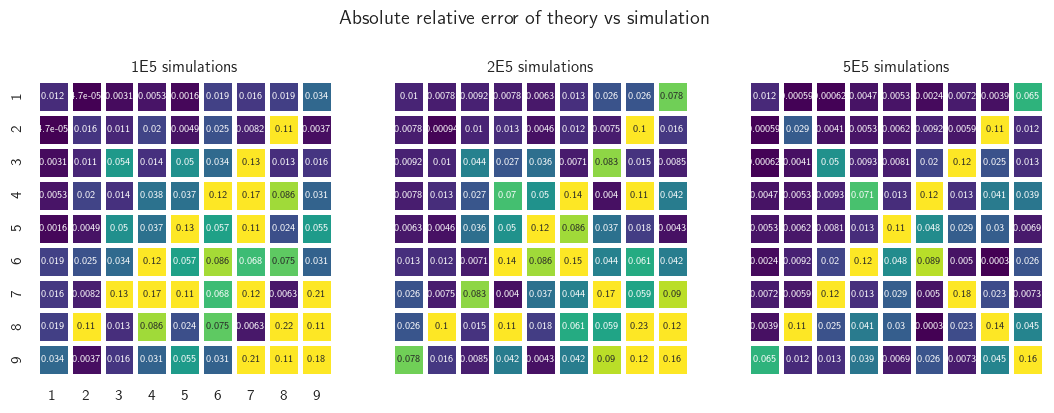

In [86]:
fix, (ax1,ax2, ax3) = plt.subplots(1,3, 
                             sharey = False,
                             sharex = False,
                             figsize = (13,4.5),
                             gridspec_kw={'width_ratios':[12,12,12]}) 

ax4 = fig.add_axes((36/37, 0.19, 1/37, 0.61))

frequencies = [i for i in range(1,10)]

sbn.heatmap(
    np.abs(relative_error_n10_1),
    ax=ax1,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax4,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    np.abs(relative_error_n10_2),
    ax=ax2,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    np.abs(relative_error_n10_5),
    ax=ax3,
    linewidths=2.5,
    vmin=0,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("1E5 simulations")
ax2.set_title("2E5 simulations")
ax3.set_title("5E5 simulations")
plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

In [87]:
print(np.sum(np.abs(relative_error_n10_1)),np.sum(np.abs(relative_error_n10_2)),np.sum(np.abs(relative_error_n10_5)))

4.333032040087605 3.800765219306317 2.6205263551048006


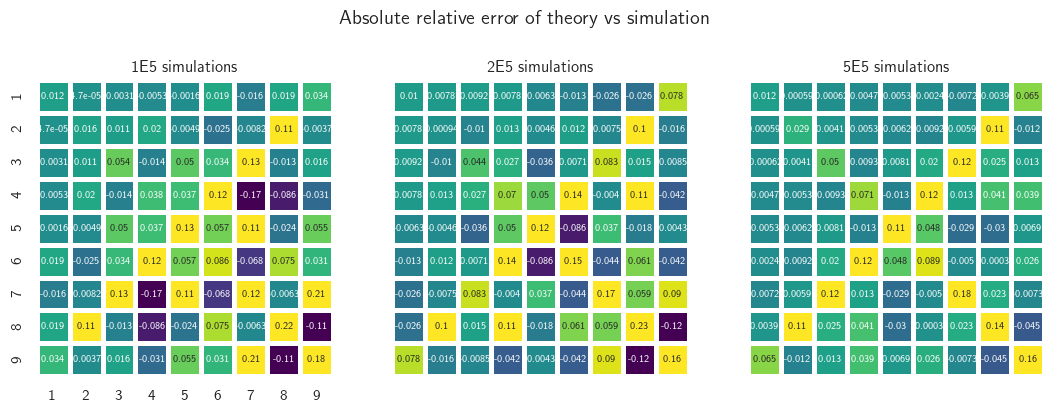

In [88]:
fix, (ax1,ax2, ax3) = plt.subplots(1,3, 
                             sharey = False,
                             sharex = False,
                             figsize = (13,4.5),
                             gridspec_kw={'width_ratios':[12,12,12]}) 

ax4 = fig.add_axes((36/37, 0.19, 1/37, 0.61))

frequencies = [i for i in range(1,10)]

sbn.heatmap(
    relative_error_n10_1,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax4,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n10_2,
    ax=ax2,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n10_5,
    ax=ax3,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("1E5 simulations")
ax2.set_title("2E5 simulations")
ax3.set_title("5E5 simulations")
plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

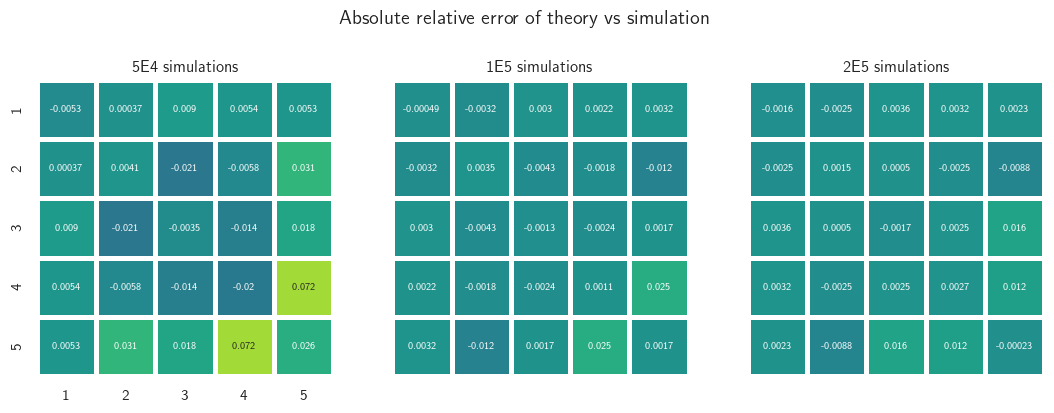

In [89]:
fix, (ax1,ax2, ax3) = plt.subplots(1,3, 
                             sharey = False,
                             sharex = False,
                             figsize = (13,4.5),
                             gridspec_kw={'width_ratios':[12,12,12]}) 

ax4 = fig.add_axes((36/37, 0.19, 1/37, 0.61))

frequencies = [i for i in range(1,6)]

sbn.heatmap(
    relative_error_n6,
    ax=ax1,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax4,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n6_,
    ax=ax2,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    relative_error_n6_2,
    ax=ax3,
    linewidths=2.5,
    vmin=-0.10,
    vmax=0.10,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

ax1.set_title("5E4 simulations")
ax2.set_title("1E5 simulations")
ax3.set_title("2E5 simulations")
plt.suptitle("Absolute relative error of theory vs simulation")
plt.show()

In [90]:
jfs6_log = np.log(jfs6_theory)
jfs_stepChange_double_log = np.log(jfs_stepChange_double)


print(jfs6_log)

[[-1.3819 -2.4936 -2.9698 -3.3161 -3.0947]
 [-2.4936 -2.5865 -3.8379 -3.4250 -5.1024]
 [-2.9698 -3.8379 -2.8357 -5.6623 -5.6976]
 [-3.3161 -3.4250 -5.6623 -3.6779 -6.1398]
 [-3.0947 -5.1024 -5.6976 -6.1398 -3.8953]]


<Axes: >

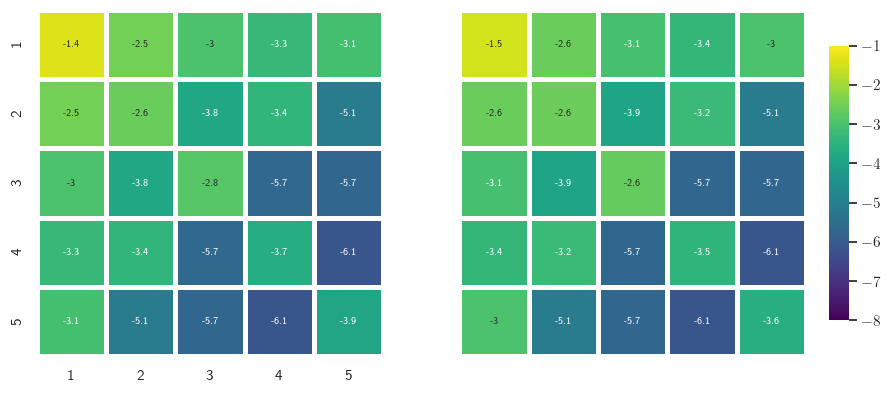

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2,
                               sharey=False,
                               sharex=False,
                               figsize=(10,4.5),
                               gridspec_kw={'width_ratios':[12,12]})
ax3 = fig.add_axes([0.92, 0.19, 0.02, 0.61])
                               

frequencies = [i for i in range(1,6)]

sbn.heatmap(
    jfs6_log,
    ax=ax1,
    linewidths=2.5,
    vmin=-8,
    vmax=-1,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cbar_kws={"shrink":0.4},
    cbar_ax=ax3,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

sbn.heatmap(
    jfs_stepChange_double_log,
    ax=ax2,
    linewidths=2.5,
    vmin=-8,
    vmax=-1,
    square=True,
    xticklabels=[],
    yticklabels=[],
    cbar=False,
    cmap='viridis',
    annot=True,
    annot_kws={"fontsize":7})

In [93]:
with open('/home/farid/Documents/git/jfsNumerics/Mathematica/JointFreqSpectrum20',
          'rb') as f: 
    depth=np.fromfile(f, dtype=np.dtype('int32'), count=1)
    dims = np.fromfile(f,dtype=np.dtype('int32'),count=depth[0])
    jfs_n20=np.reshape(np.fromfile(f,dtype=np.dtype('float64'),
                                                count=reduce(lambda x,y:x*y,dims)), dims)

In [94]:
jfs_n20_log=np.log(jfs_n20)

In [95]:
print(np.max(jfs_n20_log), np.min(jfs_n20_log))

-2.2627994786732732 -9.848992432592128


<Axes: >

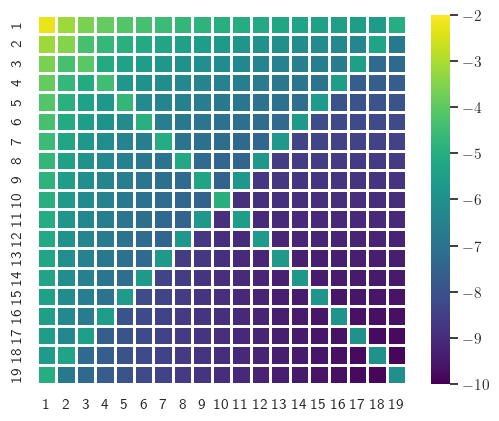

In [99]:
fig, ax = plt.subplots(1,1)
frequencies = [i for i in range(1,20)]

sbn.heatmap(
    jfs_n20_log,
    ax=ax,
    linewidths=1,
    vmin=-10,
    vmax=-2,
    square=True,
    xticklabels=frequencies,
    yticklabels=frequencies,
    cbar=True,
    cmap='viridis',
    )